# Using CIFAR with CNN in model training

In [2]:
from keras.datasets import cifar10
from keras.models import Sequential
from keras.layers import Dense, Dropout, Flatten, Conv2D, MaxPool2D
from keras.utils import to_categorical

import numpy as np
np.random.seed(0)
import matplotlib.pyplot as plt
%matplotlib inline

Using TensorFlow backend.


In [3]:
(X_train,Y_train),(X_test,Y_test) = cifar10.load_data()
X_train.shape, X_test.shape

170500096/170498071 [==============================] - 93s 1us/step


((50000, 32, 32, 3), (10000, 32, 32, 3))

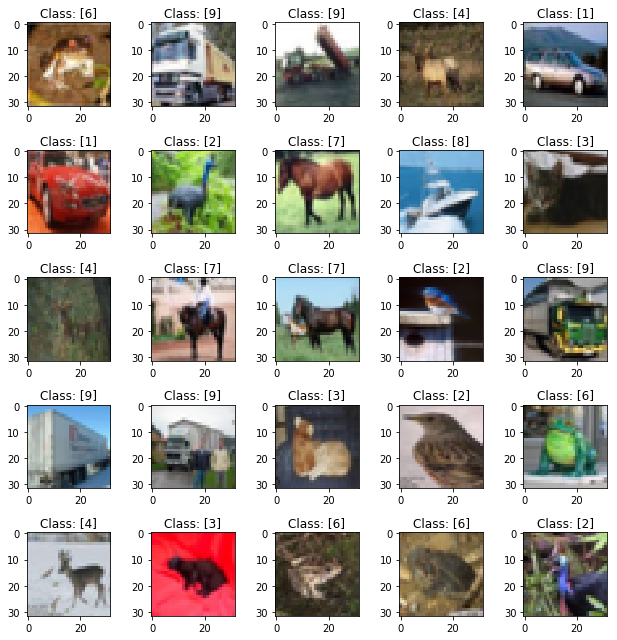

In [4]:
fig = plt.figure(figsize=(9,9))
for idx in range(25):
  plt.subplot(5,5, idx+1)
  plt.imshow(X_train[idx], cmap='gray')
  plt.title('Class: {}'.format(Y_train[idx]))
  
  plt.tight_layout()

In [0]:
img_rows, img_cols = X_train.shape[1], X_train.shape[2]
num_channels = 3
X_train = X_train.reshape(X_train.shape[0], img_rows, img_cols, num_channels)
X_test = X_test.reshape(X_test.shape[0], img_rows, img_cols, num_channels)

input_shape = (img_rows, img_cols, num_channels)

In [0]:
if np.max(X_train) >1: X_train = X_train / 255
if np.max(X_test) >1: X_test = X_test / 255

In [7]:
if len(Y_train.shape)==2:
  Y_train = Y_train.reshape(-1)
  Y_test = Y_test.reshape(-1)
if len(Y_train.shape) ==1:
  num_classes = len(set(Y_train))
  Y_train = to_categorical(Y_train, num_classes)
  Y_test = to_categorical(Y_test, num_classes)

Y_train.shape

(50000, 10)

In [8]:
model = Sequential([
    Conv2D(32, kernel_size=(3,3), activation='relu', input_shape=input_shape),
    Conv2D(32, kernel_size=(3,3), activation='relu'),
    MaxPool2D(pool_size=(2,2)),
    Dropout(0.25),
    
    Conv2D(filters=64, kernel_size=(3,3), activation='relu'),
    Conv2D(filters=64, kernel_size=(3,3), activation='relu'),
    MaxPool2D(pool_size=(2,2)),
    Dropout(0.25),

    
    Conv2D(filters=128, kernel_size=(3,3), activation='relu'),
    MaxPool2D(pool_size=(2,2)),
    Dropout(0.25),
    
    Flatten(),
    Dense(1024, activation='relu'),
    Dropout(0.5),
    Dense(num_classes, activation='softmax'),
])

model.compile(loss='categorical_crossentropy', optimizer='adam', metrics=['accuracy'])

model.summary()

Instructions for updating:
Colocations handled automatically by placer.
Instructions for updating:
Please use `rate` instead of `keep_prob`. Rate should be set to `rate = 1 - keep_prob`.


In [12]:
model.summary()

_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d_1 (Conv2D)            (None, 30, 30, 32)        896       
_________________________________________________________________
max_pooling2d_1 (MaxPooling2 (None, 15, 15, 32)        0         
_________________________________________________________________
dropout_1 (Dropout)          (None, 15, 15, 32)        0         
_________________________________________________________________
conv2d_2 (Conv2D)            (None, 13, 13, 64)        18496     
_________________________________________________________________
max_pooling2d_2 (MaxPooling2 (None, 6, 6, 64)          0         
_________________________________________________________________
dropout_2 (Dropout)          (None, 6, 6, 64)          0         
_________________________________________________________________
flatten_1 (Flatten)          (None, 2304)              0         
__________

In [11]:
model.fit(
  X_train, Y_train,
  batch_size=256,
  epochs=5,
    verbose=2,
  validation_data=(X_test,Y_test)
)

Train on 50000 samples, validate on 10000 samples
Epoch 1/5
 - 5s - loss: 1.1744 - acc: 0.5853 - val_loss: 1.0632 - val_acc: 0.6292
Epoch 2/5
 - 5s - loss: 1.0717 - acc: 0.6220 - val_loss: 1.0028 - val_acc: 0.6531
Epoch 3/5
 - 5s - loss: 1.0049 - acc: 0.6465 - val_loss: 0.9361 - val_acc: 0.6779
Epoch 4/5
 - 5s - loss: 0.9447 - acc: 0.6695 - val_loss: 0.9052 - val_acc: 0.6854
Epoch 5/5
 - 5s - loss: 0.9112 - acc: 0.6814 - val_loss: 0.8598 - val_acc: 0.7047


In [13]:
model.evaluate(X_test, Y_test)

10000/10000 [==============================] - 1s 115us/step


[0.8598278427124023, 0.7047]